# ML Product Recommendation
Note to self, using venv in examples folder on laptop
## 1. Imports and Loading the Data

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('user_personalized_features.csv')

# Separate dataset into feature matrix and target vector
X = data.drop(['Product_Category_Preference', 'Unnamed: 0', 'User_ID'], axis=1)    # Axis 0 to drop rows, 1 for cols
y = data['Product_Category_Preference']
print(f'Feature Matrix:\n{X.head()}\n')
print(f'Target Vector:\n{y.head()}')

Feature Matrix:
   Age  Gender  Location  Income   Interests  Last_Login_Days_Ago  \
0   56    Male  Suburban   38037      Sports                    5   
1   46  Female     Rural  103986  Technology                   15   
2   32  Female  Suburban  101942      Sports                   28   
3   60  Female  Suburban   71612     Fashion                   18   
4   25    Male  Suburban   49725      Travel                    2   

   Purchase_Frequency  Average_Order_Value  Total_Spending  \
0                   7                   18            2546   
1                   7                  118             320   
2                   1                  146            3766   
3                   3                  163            4377   
4                   5                  141            4502   

   Time_Spent_on_Site_Minutes  Pages_Viewed  Newsletter_Subscription  
0                         584            38                     True  
1                         432            40           

## 2. Preprocessing

In [91]:
# Check missing values
print(X.isna().sum())
print()
print(y.isna().sum())

# Print data types to see if we have to apply encoding
print(X.dtypes)
print(y.dtype)

# Print data scales to see if we have to apply Scaler
print(X.describe())

Age                           0
Gender                        0
Location                      0
Income                        0
Interests                     0
Last_Login_Days_Ago           0
Purchase_Frequency            0
Average_Order_Value           0
Total_Spending                0
Time_Spent_on_Site_Minutes    0
Pages_Viewed                  0
Newsletter_Subscription       0
dtype: int64

0
Age                            int64
Gender                        object
Location                      object
Income                         int64
Interests                     object
Last_Login_Days_Ago            int64
Purchase_Frequency             int64
Average_Order_Value            int64
Total_Spending                 int64
Time_Spent_on_Site_Minutes     int64
Pages_Viewed                   int64
Newsletter_Subscription         bool
dtype: object
object
               Age         Income  Last_Login_Days_Ago  Purchase_Frequency  \
count  1000.000000    1000.000000          1000.000000   

In [92]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}\n')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (900, 12)
y_train shape: (900,)

X_test shape: (100, 12)
y_test shape: (100,)


## 3. Model Training

In [93]:
# Make pipeline to apply scaling and encoding
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Scaling and encoding
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['bool', 'object']).columns.tolist()

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

pca = PCA(n_components=10)

# Pipelines implementing the preprocessing and models
logistic_regression_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', pca),
    ('model', LogisticRegression(max_iter=1000)),

])

random_forest_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', pca),
    ('model', RandomForestClassifier(n_estimators=100))
])

gradient_boosting_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', pca),
    ('model', GradientBoostingClassifier(n_estimators=100))
])

svc_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', pca),
    ('model', SVC())
])

knn_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', pca),
    ('model', KNeighborsClassifier())
])

mlp_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', pca),
    ('model', MLPClassifier(max_iter=700))
])

In [94]:
# Training the models
logistic_regression_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)
gradient_boosting_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
mlp_pipeline.fit(X_train, y_train)

# Evaluating models
logistic_score = logistic_regression_pipeline.score(X_test, y_test)
random_forest_score = random_forest_pipeline.score(X_test, y_test)
gradient_boosting_score = gradient_boosting_pipeline.score(X_test, y_test)
svc_score = svc_pipeline.score(X_test, y_test)
knn_score = knn_pipeline.score(X_test, y_test)
mlp_score = mlp_pipeline.score(X_test, y_test)

print(f'logistic regression accuracy score (pre-GridSearch): {logistic_score:.4f}')
print(f'random forest accuracy score (pre-GridSearch): {random_forest_score:.4f}')
print(f'gradient boosting accuracy score (pre-GridSearch): {gradient_boosting_score:.4f}')
print(f'SVC accuracy score (pre-GridSearch): {svc_score:.4f}')
print(f'KNN accuracy score (pre-GridSearch): {knn_score:.4f}')
print(f'MLP accuracy score (pre-GridSearch): {mlp_score:.4f}')

logistic regression accuracy score (pre-GridSearch): 0.1700
random forest accuracy score (pre-GridSearch): 0.2600
gradient boosting accuracy score (pre-GridSearch): 0.2000
SVC accuracy score (pre-GridSearch): 0.2000
KNN accuracy score (pre-GridSearch): 0.2800
MLP accuracy score (pre-GridSearch): 0.2500


c:\.home\1. Local Github\.Uni\2025\Winter\ENSF 444\Examples\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


In [95]:
# Optimizing the models to improve performance (Takes about 2 mins)
from sklearn.model_selection import GridSearchCV

# Make grids with hyperparameters to change for each model
logistic_regression_grid = {
    'model__C': [0.1, 1, 10, 100],  # changing regularization strength (< is stronger)
    'model__solver': ['liblinear', 'lbfgs']
}

random_forest_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10], 
    'model__min_samples_leaf': [1, 2, 4]
}

gradient_boosting_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.001, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

svc_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__kernel': ['linear', 'poly', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

knn_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

mlp_grid = {
    'model__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate': ['constant', 'adaptive'],
    'model__alpha': [0.0001, 0.001, 0.01],
    'model__max_iter': [200, 500, 1000]
}

# Create the GridSearchCV for each model
logistic_search = GridSearchCV(
    logistic_regression_pipeline,
    logistic_regression_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

random_forest_search = GridSearchCV(
    random_forest_pipeline,
    random_forest_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

gradient_boosting_search = GridSearchCV(
    gradient_boosting_pipeline,
    gradient_boosting_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

svc_search = GridSearchCV(
    svc_pipeline,
    svc_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

knn_search = GridSearchCV(
    knn_pipeline,
    knn_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

mlp_search = GridSearchCV(
    mlp_pipeline,
    mlp_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)


# Fitting the models using the GridSearchCV
logistic_search.fit(X_train, y_train)
random_forest_search.fit(X_train, y_train)
gradient_boosting_search.fit(X_train, y_train)
svc_search.fit(X_train, y_train)
knn_search.fit(X_train, y_train)
mlp_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\.home\1. Local Github\.Uni\2025\Winter\ENSF 444\Examples\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Income',
                                                                          'Last_Login_Days_Ago',
                                                                          'Purchase_Frequency',
                                                                          'Average_Order_Value',
                                                                          'Total_Spending',
                                                                          'Time_Spent_on_Site_Minutes',
                                                                          'Pages_Viewed']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'Location',
                                                                          'Interests',
                                                                          'Newsletter_Subscription'])])),
                                       ('pca', PCA(n_components=10)),
                                       ('model', MLPClassifier(max_iter=700))]),
             n_jobs=-1,
             param_grid={'model__activation': ['relu', 'tanh'],
                         'model__alpha': [0.0001, 0.001, 0.01],
                         'model__hidden_layer_sizes': [(50,), (100,),
                                                       (100, 50)],
                         'model__learning_rate': ['constant', 'adaptive'],
                         'model__max_iter': [200, 500, 1000]},
             scoring='accuracy', verbose=2)

In [96]:
# Display best hyperparameters and scores from the GridSearchCV models
print('Logistic Regression best score:', logistic_search.best_score_)
print('Logistic Regression best params:', logistic_search.best_params_)

print('\nRandom Forest best score:', random_forest_search.best_score_)
print('Random Forest best params:', random_forest_search.best_params_)

print('\nGradient Boosting best score:', gradient_boosting_search.best_score_)
print('Gradient Boosting best params:', gradient_boosting_search.best_params_)

print('\nSVC best score:', svc_search.best_score_)
print('SVC best params:', svc_search.best_params_)

print('\nKNN best score:', knn_search.best_score_)
print('KNN best params:', knn_search.best_params_)

print('\nMLP best score:', mlp_search.best_score_)
print('MLP best params:', mlp_search.best_params_)

Logistic Regression best score: 0.2011111111111111
Logistic Regression best params: {'model__C': 0.1, 'model__solver': 'liblinear'}

Random Forest best score: 0.2111111111111111
Random Forest best params: {'model__max_depth': 20, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5, 'model__n_estimators': 50}

Gradient Boosting best score: 0.21555555555555556
Gradient Boosting best params: {'model__learning_rate': 0.001, 'model__max_depth': 3, 'model__n_estimators': 100}

SVC best score: 0.2166666666666667
SVC best params: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'poly'}

KNN best score: 0.20555555555555557
KNN best params: {'model__metric': 'euclidean', 'model__n_neighbors': 3, 'model__weights': 'distance'}

MLP best score: 0.21222222222222223
MLP best params: {'model__activation': 'relu', 'model__alpha': 0.001, 'model__hidden_layer_sizes': (50,), 'model__learning_rate': 'adaptive', 'model__max_iter': 1000}


## 4. Model Validation & Visualization


=== Logistic Regression Metrics ===
                 precision    recall  f1-score   support

        Apparel       0.22      0.45      0.29        22
          Books       0.14      0.10      0.12        20
    Electronics       0.21      0.24      0.22        21
Health & Beauty       0.00      0.00      0.00        18
 Home & Kitchen       0.17      0.05      0.08        19

       accuracy                           0.18       100
      macro avg       0.15      0.17      0.14       100
   weighted avg       0.15      0.18      0.15       100



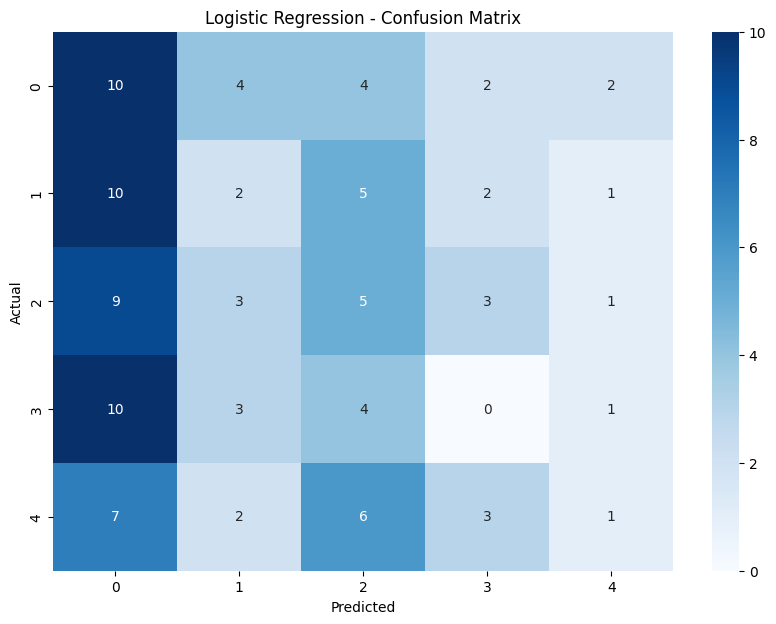


=== Random Forest Metrics ===
                 precision    recall  f1-score   support

        Apparel       0.21      0.32      0.25        22
          Books       0.23      0.15      0.18        20
    Electronics       0.19      0.14      0.16        21
Health & Beauty       0.17      0.22      0.19        18
 Home & Kitchen       0.23      0.16      0.19        19

       accuracy                           0.20       100
      macro avg       0.20      0.20      0.19       100
   weighted avg       0.20      0.20      0.20       100



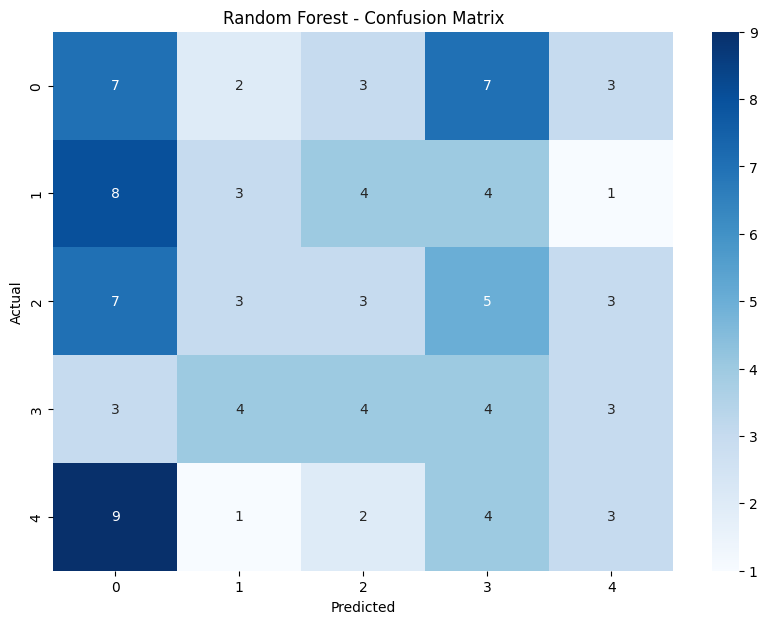


=== Gradient Boosting Metrics ===
                 precision    recall  f1-score   support

        Apparel       0.22      0.91      0.35        22
          Books       1.00      0.05      0.10        20
    Electronics       0.00      0.00      0.00        21
Health & Beauty       0.25      0.06      0.09        18
 Home & Kitchen       0.00      0.00      0.00        19

       accuracy                           0.22       100
      macro avg       0.29      0.20      0.11       100
   weighted avg       0.29      0.22      0.11       100



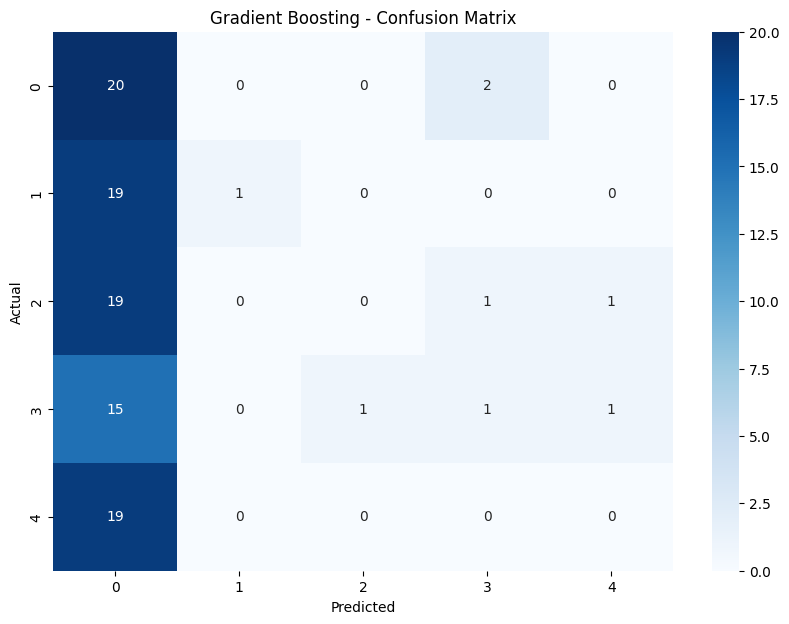

c:\.home\1. Local Github\.Uni\2025\Winter\ENSF 444\Examples\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\.home\1. Local Github\.Uni\2025\Winter\ENSF 444\Examples\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\.home\1. Local Github\.Uni\2025\Winter\ENSF 444\Examples\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 


=== SVC Metrics ===
                 precision    recall  f1-score   support

        Apparel       0.23      1.00      0.37        22
          Books       0.00      0.00      0.00        20
    Electronics       0.33      0.05      0.08        21
Health & Beauty       0.00      0.00      0.00        18
 Home & Kitchen       0.00      0.00      0.00        19

       accuracy                           0.23       100
      macro avg       0.11      0.21      0.09       100
   weighted avg       0.12      0.23      0.10       100



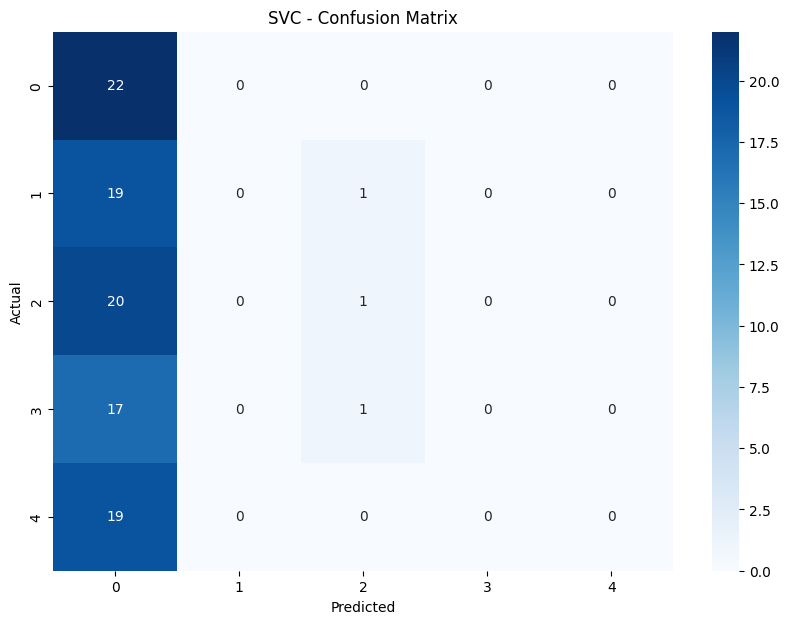


=== KNN Metrics ===
                 precision    recall  f1-score   support

        Apparel       0.12      0.14      0.13        22
          Books       0.14      0.15      0.15        20
    Electronics       0.25      0.14      0.18        21
Health & Beauty       0.24      0.33      0.28        18
 Home & Kitchen       0.17      0.16      0.16        19

       accuracy                           0.18       100
      macro avg       0.18      0.18      0.18       100
   weighted avg       0.18      0.18      0.18       100



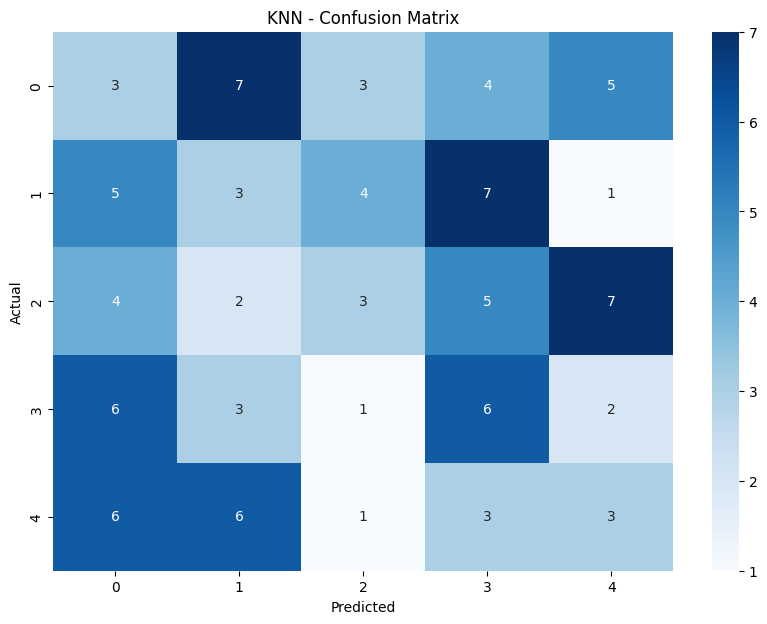


=== MLP Neural Network Metrics ===
                 precision    recall  f1-score   support

        Apparel       0.14      0.18      0.16        22
          Books       0.28      0.25      0.26        20
    Electronics       0.26      0.24      0.25        21
Health & Beauty       0.14      0.17      0.15        18
 Home & Kitchen       0.07      0.05      0.06        19

       accuracy                           0.18       100
      macro avg       0.18      0.18      0.18       100
   weighted avg       0.18      0.18      0.18       100



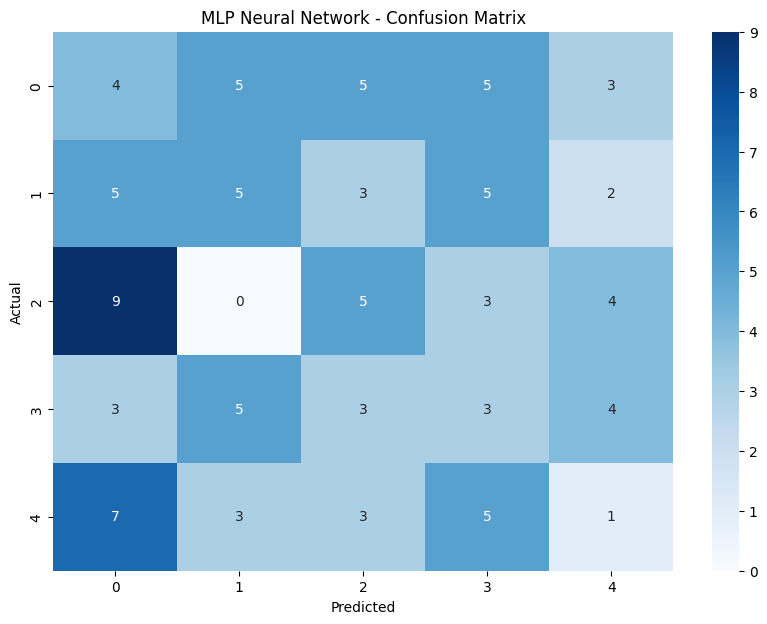

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

# Predicting with best estimators found using GridSearch
y_pred_lr = logistic_search.best_estimator_.predict(X_test)
y_pred_rf = random_forest_search.best_estimator_.predict(X_test)
y_pred_gb = gradient_boosting_search.best_estimator_.predict(X_test)
y_pred_svc = svc_search.best_estimator_.predict(X_test)
y_pred_knn = knn_search.best_estimator_.predict(X_test)
y_pred_mlp = mlp_search.best_estimator_.predict(X_test)

# Dictionary to store results
results = []

def evaluate_model(model_name, y_test, y_pred):
    # Calculating metrics for the model
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save model metrics to results dictionary
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    # Print the classification report for the model
    print(f"\n=== {model_name} Metrics ===")
    print(report)
    
    # Plot confusion matrix for the model
    conf_matrx = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrx, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate each model
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)
evaluate_model("SVC", y_test, y_pred_svc)
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("MLP Neural Network", y_test, y_pred_mlp)

# Convert results list to DataFrame so we can then use it to make more graphs
results_df = pd.DataFrame(results)


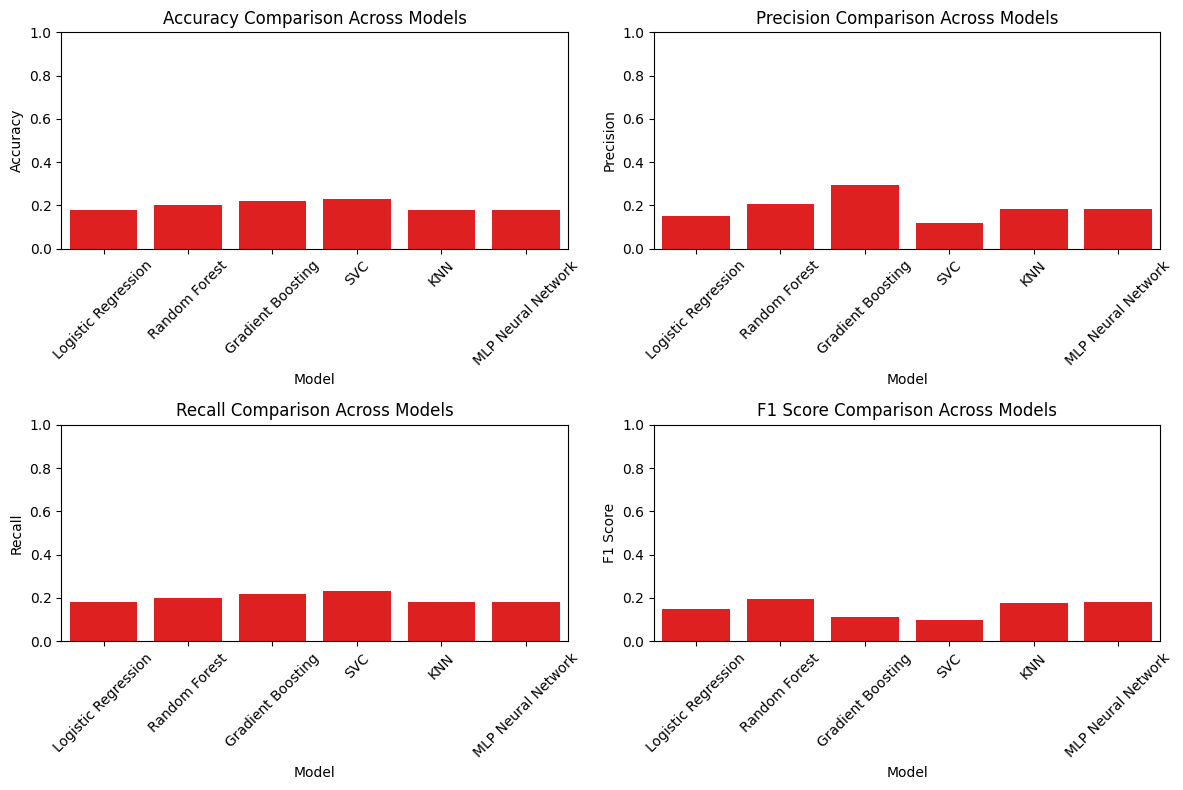

In [98]:
# Plot Accuracy, Precision, Recall, and F1 Score for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=results_df, color='red')
    plt.title(f'{metric} Comparison Across Models')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()


## 5. Conclusion and Analysis
### Summary
From all the times I have run the code, it appears that the highest accuracy achieved has been 30%, with an average around 20%. As such, I would not recommend to use this code as a part of Emazon's solution for their personalized product recommendation feature. However, this is unlikely to be due bad model selection, data preprocessing, or hyperparameter tuning, but rather having to do with the dataset itself. The reasons I state this claim are the following observations:
- There is low performance across all models. Even after applying 3-step preprocessing consisting of transforming numerical data with StandardScaler, transforming categorical data with OneHotEncoding, and then applying Principal Component Analysis (manually tested with different `n_components` param values), as well as tuning the hyperparameters using GridSearchCV, all models proved to have innacurate generalizations. Not only is the low performance peculiar due to the preprocessing and hyperparameter tuning that was done, but also due to the fact that the models used are all different types: Logistic Regression is linear, Random Forest and Gradient Boosting are tree-based/non-linear models, SVC is a non-linear model, K-Nearest-Neighbours is distance-based/non-linear, and the MLP is a neural network model. Each of these models is best suited and performs best on datasets and feature matrices that exhivbit certain properties, so it would be reasonable to expect that at least *one* of these models would out-perform the others by a noticeable and reproducible margin. However, this is not the case. This suggests that the problem is not related to the models chosen, hyperparameters, or preprocessing, but rather perhaps having to do with the dataset itself.

- As can be observed by the SVC model confusion matrix, the model has a tendency to predict *only* the Apparel class for all inputs. This is an indicator that it cannot differentiate between the possible classes based on the input. This further suggests that the problem could be with the the correlation (or lack thereof) between the feature matrix and the target vector.

- PCA was applied to help reduce the dimensionality of the feature matrix in order to reduce the potential noise, and to help increase the likelihood that the resulting feature matrix would only be comprised of the most important features for predicting the label. However, performance with and without applying PCA was similar, suggesting that the principal components could not provide a meaningful distinction between the classes. Again, this supports the argument that the issue lies not with the models, preprocessing, or hyperparameter tuning but rather with the dataset (or rather the use of this specific feature matrix to predict the target vector).

### Possible Reasons for Bad Performance
- Insufficiently large dataset. There is not enough samples in the dataset to allow the models to find the right predictors and correlations between the feature matrix and the target vector. As a result, all the models could be under-fitting, and be unable to generalize well.

- Very little, if any, correlation between the feature matrix and target vector. This is especially supported by the observations explained above. If this is the case, it would explain why the model accuracy and other results remained largely the same even after introducing the hyperparameter tuning and the preprocessing.

- Too much randomness in the target vector. That is to say, regardless of patterns and generalizations learned by the models, the target vector might be random and/or not always explained by the feature matrix.

### Suggested Action
If this code *has* to be utilized by Emazon, a decision should be made on which model should be used based on the above metrics seen. I believe the model with the highest F1 score should be chosen. This is because the calculation for the F1 score uses the values of Recall and Precision, and thus a higher F1 will correspond with a better balance of Recall and Precision values. That being said, after having run the code many times (and thus randomizing the train/test sets as well as the initial state of the models), I have not observed a trend in the highest accuracy or F1 score models. For these reasons, I believe it would be in the best interest of Emazon to either increase the size of the dataset or increase the dimentionality of their dataset to potentially record better correlated features. Alternatively, they can choose to recommend products not based on the most likely category of product the user wants (the 'product category preference' currently set as the target vector), but rather another target vector. For example, they can decide to train a model to determine which user to advertise signing up for a marketing email, etc.